In [334]:
# half light year NGC 6366
import numpy as np
import math
r= 3.77  # Half light radius of the cluster(pc)
d=4*r
d #Required diameter of cluster
d2=3440 #pc
angle_radian=d/d2
angle_radian
angle_degree= angle_radian*180/math.pi  #convert radian to degree
angle_degree

0.2511687078654888

In [335]:
dist1=(r/d2)*57.2958  # Converting half light to degree
dist2=(2*r/d2)* 57.2958
dist3=(3*r/d2)* 57.2958
dist4=(4*r/d2)* 57.2958
print('half-light=', dist1)
print('2half-light=', dist2)
print('3half-light=', dist3)
print('4half-light=', dist4)

half-light= 0.06279219941860466
2half-light= 0.12558439883720932
3half-light= 0.18837659825581396
4half-light= 0.25116879767441863


In [336]:
from astroquery.vizier import Vizier
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source" 
from astropy.coordinates import SkyCoord
import astropy.units as u
import warnings
#Vizier.ROW_LIMIT = -1
row_limit=-1
from astroquery.vo_conesearch import ConeSearch
from astropy.coordinates import Angle
coord = SkyCoord(ra= 261.93436, dec= -5.07986, unit=(u.degree, u.degree), frame='icrs')
result = Vizier.query_region("NGC6366", radius=Angle(angle_degree, "deg"), catalog='GAIA EDR3')
#Vizier.ROW_LIMIT = -1

In [337]:
import astropy.units as u
Vizier.ROW_LIMIT = 100000000
result = Vizier.query_region("NGC6366", radius=angle_degree*u.deg)
result

TableList with 265 tables:
	'0:METAobj' with 5 column(s) and 1 row(s) 
	'1:ReadMeObj' with 5 column(s) and 1 row(s) 
	'2:I/98A/catalog' with 20 column(s) and 1 row(s) 
	'3:I/119/sd' with 8 column(s) and 3 row(s) 
	'4:I/143/fk4_1975' with 15 column(s) and 1 row(s) 
	'5:I/193/ppm2' with 12 column(s) and 1 row(s) 
	'6:I/195/catalog' with 8 column(s) and 1 row(s) 
	'7:I/197A/tic' with 10 column(s) and 5 row(s) 
	'8:I/208/ppm3' with 12 column(s) and 1 row(s) 
	'9:I/239/tyc_main' with 11 column(s) and 1 row(s) 
	'10:I/246/act' with 8 column(s) and 1 row(s) 
	'11:I/252/out' with 8 column(s) and 4123 row(s) 
	'12:I/256/stars' with 9 column(s) and 2 row(s) 
	'13:I/259/tyc2' with 10 column(s) and 1 row(s) 
	'14:I/259/suppl_1' with 10 column(s) and 1 row(s) 
	'15:I/265/cpc2main' with 7 column(s) and 2 row(s) 
	'16:I/271/out' with 11 column(s) and 3444 row(s) 
	'17:I/275/ac2002' with 9 column(s) and 11 row(s) 
	'18:I/280B/ascc' with 12 column(s) and 3 row(s) 
	'19:I/283A/npm2' with 11 column(s) an

In [338]:
#import astroquery
#from astroquery.vizier import Vizier
#from astropy.coordinates import SkyCoord
#from astropy import units as u

#print(astroquery.__version__)
# 0.3.10.dev5533

columns = ['EDR3Name','RA_ICRS', 'DE_ICRS', 'Plx','e_Plx','Gmag', 'BP-RP'
           , 'PM', 'pmRA','pmDE', 'epsi', 'RUWE']

vquery = Vizier(columns=columns, row_limit=-1)

field = SkyCoord(ra=261.93436*u.deg, dec=-5.07986*u.deg, frame='icrs')

hdu = vquery.query_region(field,
                               radius=angle_degree*u.deg,
                               catalog="I/350/gaiaedr3")[0]

print(len(hdu.colnames), len(columns))

12 12


In [339]:
hdu

EDR3Name,RA_ICRS,DE_ICRS,Plx,e_Plx,Gmag,BP-RP,PM,pmRA,pmDE,epsi,RUWE
,deg,deg,mas,mas,mag,mag,mas / yr,mas / yr,mas / yr,mas,
str29,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64
Gaia EDR3 4362208926031324544,262.00765883298,-5.31983324466,0.3248,0.2903,19.168783,2.071386,1.998,-0.403,1.957,0.000,0.963
Gaia EDR3 4362208930324979072,262.01152574605,-5.31803808164,-0.1680,0.4011,19.520887,1.809080,7.377,-1.663,-7.187,0.479,1.045
Gaia EDR3 4362208930326485504,262.01277836407,-5.31819159386,0.7238,0.5323,19.941761,1.789839,6.134,-0.240,-6.130,1.138,1.051
Gaia EDR3 4362208960390027392,261.98605139727,-5.32008262460,-0.1998,0.3845,19.520573,1.630903,3.756,1.029,-3.612,0.000,0.952
Gaia EDR3 4362208960390028800,261.98884928791,-5.32007611654,0.4831,0.2398,18.803484,1.806189,3.226,-1.998,-2.533,0.407,1.042
...,...,...,...,...,...,...,...,...,...,...,...
Gaia EDR3 4362669346523928576,261.81454594482,-4.86177616435,0.1276,0.6881,20.205729,1.675455,3.358,2.352,-2.397,1.362,1.024
Gaia EDR3 4362669346523934976,261.81763763579,-4.85766720768,0.0557,1.1264,20.490816,1.416685,4.086,-1.720,-3.706,2.226,1.092


In [340]:
hdu[1]

EDR3Name,RA_ICRS,DE_ICRS,Plx,e_Plx,Gmag,BP-RP,PM,pmRA,pmDE,epsi,RUWE
,deg,deg,mas,mas,mag,mag,mas / yr,mas / yr,mas / yr,mas,
str29,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64
Gaia EDR3 4362208930324979072,262.01152574605,-5.31803808164,-0.1680,0.4011,19.520887,1.809080,7.377,-1.663,-7.187,0.479,1.045


Text(0.5, 1.0, 'NGC 6366')

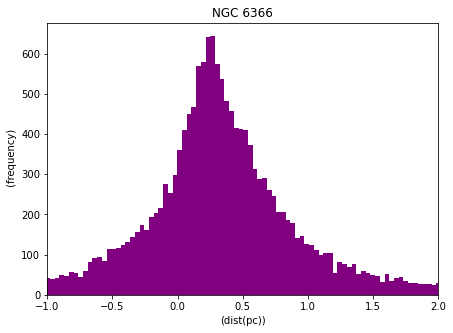

In [341]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
bins = 1000
plt.hist(hdu["Plx"],bins = bins,color='purple')
plt.xlabel('(dist(pc))')
plt.xlim(-1.0,2.0)
plt.ylabel(' (frequency)')
plt.title('NGC 6366')
#plt.savefig("a.png", dpi=120)


In [342]:
hdu1=hdu[hdu['Plx']>0]
hdu1

EDR3Name,RA_ICRS,DE_ICRS,Plx,e_Plx,Gmag,BP-RP,PM,pmRA,pmDE,epsi,RUWE
,deg,deg,mas,mas,mag,mag,mas / yr,mas / yr,mas / yr,mas,
str29,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64
Gaia EDR3 4362208926031324544,262.00765883298,-5.31983324466,0.3248,0.2903,19.168783,2.071386,1.998,-0.403,1.957,0.000,0.963
Gaia EDR3 4362208930326485504,262.01277836407,-5.31819159386,0.7238,0.5323,19.941761,1.789839,6.134,-0.240,-6.130,1.138,1.051
Gaia EDR3 4362208960390028800,261.98884928791,-5.32007611654,0.4831,0.2398,18.803484,1.806189,3.226,-1.998,-2.533,0.407,1.042
Gaia EDR3 4362208964688550016,261.99224602451,-5.31818343886,0.5916,0.0556,16.359903,1.562555,6.906,6.095,3.248,0.000,0.993
Gaia EDR3 4362208994749783424,262.00900024472,-5.31374151631,0.7966,0.3185,19.259504,1.761248,6.678,3.657,-5.587,0.607,1.049
...,...,...,...,...,...,...,...,...,...,...,...
Gaia EDR3 4362669312164180096,261.80626983779,-4.86986788594,1.6041,0.2847,19.084116,2.495876,8.080,-2.605,-7.648,0.000,1.020
Gaia EDR3 4362669346523928576,261.81454594482,-4.86177616435,0.1276,0.6881,20.205729,1.675455,3.358,2.352,-2.397,1.362,1.024


In [343]:
hdu2=hdu1[hdu1['RUWE']<1.4]
hdu2

EDR3Name,RA_ICRS,DE_ICRS,Plx,e_Plx,Gmag,BP-RP,PM,pmRA,pmDE,epsi,RUWE
,deg,deg,mas,mas,mag,mag,mas / yr,mas / yr,mas / yr,mas,
str29,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64
Gaia EDR3 4362208926031324544,262.00765883298,-5.31983324466,0.3248,0.2903,19.168783,2.071386,1.998,-0.403,1.957,0.000,0.963
Gaia EDR3 4362208930326485504,262.01277836407,-5.31819159386,0.7238,0.5323,19.941761,1.789839,6.134,-0.240,-6.130,1.138,1.051
Gaia EDR3 4362208960390028800,261.98884928791,-5.32007611654,0.4831,0.2398,18.803484,1.806189,3.226,-1.998,-2.533,0.407,1.042
Gaia EDR3 4362208964688550016,261.99224602451,-5.31818343886,0.5916,0.0556,16.359903,1.562555,6.906,6.095,3.248,0.000,0.993
Gaia EDR3 4362208994749783424,262.00900024472,-5.31374151631,0.7966,0.3185,19.259504,1.761248,6.678,3.657,-5.587,0.607,1.049
...,...,...,...,...,...,...,...,...,...,...,...
Gaia EDR3 4362669312164180096,261.80626983779,-4.86986788594,1.6041,0.2847,19.084116,2.495876,8.080,-2.605,-7.648,0.000,1.020
Gaia EDR3 4362669346523928576,261.81454594482,-4.86177616435,0.1276,0.6881,20.205729,1.675455,3.358,2.352,-2.397,1.362,1.024


In [344]:
import numpy
x1=numpy.mean(hdu2["Plx"]) #The mean of the parallax 
print(x1)

0.6439411974687652


In [345]:
hdu3=hdu2[hdu2['Plx']<x1]  #@ mean parallax is choosen
hdu3

EDR3Name,RA_ICRS,DE_ICRS,Plx,e_Plx,Gmag,BP-RP,PM,pmRA,pmDE,epsi,RUWE
,deg,deg,mas,mas,mag,mag,mas / yr,mas / yr,mas / yr,mas,
str29,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64
Gaia EDR3 4362208926031324544,262.00765883298,-5.31983324466,0.3248,0.2903,19.168783,2.071386,1.998,-0.403,1.957,0.000,0.963
Gaia EDR3 4362208960390028800,261.98884928791,-5.32007611654,0.4831,0.2398,18.803484,1.806189,3.226,-1.998,-2.533,0.407,1.042
Gaia EDR3 4362208964688550016,261.99224602451,-5.31818343886,0.5916,0.0556,16.359903,1.562555,6.906,6.095,3.248,0.000,0.993
Gaia EDR3 4362210334779615104,262.05838976242,-5.29762903668,0.4643,0.1463,17.928726,1.683151,3.557,1.009,-3.411,0.140,1.056
Gaia EDR3 4362210369139363712,262.06291961774,-5.29279610056,0.5234,0.1962,18.519123,1.619905,4.114,2.072,-3.554,0.000,0.975
...,...,...,...,...,...,...,...,...,...,...,...
Gaia EDR3 4362669209084957440,261.79111780094,-4.87686303875,0.4770,0.4982,19.773443,1.682196,5.865,-4.070,-4.224,0.706,1.026
Gaia EDR3 4362669346523928576,261.81454594482,-4.86177616435,0.1276,0.6881,20.205729,1.675455,3.358,2.352,-2.397,1.362,1.024


In [346]:
#hdu4=hdu3[hdu3['epsi']<=2]  #@ D<=2 is choosen
hdu4=hdu3[hdu3['epsi']<=2]
hdu4

EDR3Name,RA_ICRS,DE_ICRS,Plx,e_Plx,Gmag,BP-RP,PM,pmRA,pmDE,epsi,RUWE
,deg,deg,mas,mas,mag,mag,mas / yr,mas / yr,mas / yr,mas,
str29,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64
Gaia EDR3 4362208926031324544,262.00765883298,-5.31983324466,0.3248,0.2903,19.168783,2.071386,1.998,-0.403,1.957,0.000,0.963
Gaia EDR3 4362208960390028800,261.98884928791,-5.32007611654,0.4831,0.2398,18.803484,1.806189,3.226,-1.998,-2.533,0.407,1.042
Gaia EDR3 4362208964688550016,261.99224602451,-5.31818343886,0.5916,0.0556,16.359903,1.562555,6.906,6.095,3.248,0.000,0.993
Gaia EDR3 4362210334779615104,262.05838976242,-5.29762903668,0.4643,0.1463,17.928726,1.683151,3.557,1.009,-3.411,0.140,1.056
Gaia EDR3 4362210369139363712,262.06291961774,-5.29279610056,0.5234,0.1962,18.519123,1.619905,4.114,2.072,-3.554,0.000,0.975
...,...,...,...,...,...,...,...,...,...,...,...
Gaia EDR3 4362669179021563392,261.78592346924,-4.88198753812,0.3247,0.7104,20.254585,1.505533,2.984,-2.752,1.154,1.713,1.088
Gaia EDR3 4362669209084957440,261.79111780094,-4.87686303875,0.4770,0.4982,19.773443,1.682196,5.865,-4.070,-4.224,0.706,1.026


Text(0.5, 1.0, 'NGC 6366')

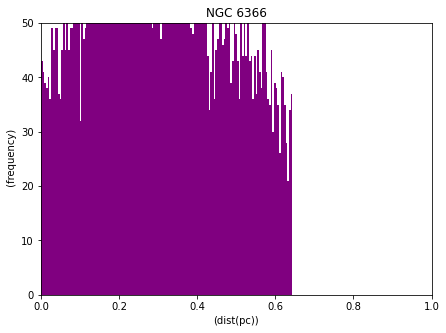

In [347]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
bins =150
binsize=1
plt.hist(hdu4["Plx"],bins = bins,color='purple')
plt.xlabel('(dist(pc))')
plt.xlim(0,1)
plt.ylim(0,50)
plt.ylabel(' (frequency)')
plt.title('NGC 6366')
#plt.savefig("a.png", dpi=120)

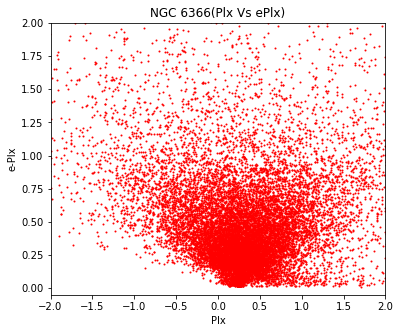

In [348]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(hdu['Plx'],hdu['e_Plx'],color='red', linestyle = '', marker = 'o', ms = 1)
plt.xlabel('Plx')
plt.ylabel('e-Plx')
plt.xlim(-2,2)
plt.ylim(-0.05,2)
plt.title('NGC 6366(Plx Vs ePlx)')
plt.savefig("a.png", dpi=120)

In [349]:
fc = hdu4['PM'].tolist()
print(fc)
len(fc)

[1.998, 3.226, 6.906, 3.557, 4.114, 5.41, 6.912, 12.701, 3.795, 8.003, 10.122, 10.525, 6.379, 7.358, 3.577, 5.788, 1.895, 3.181, 7.347, 3.943, 1.811, 5.689, 8.647, 7.083, 4.514, 2.822, 2.439, 4.2, 6.476, 4.608, 6.616, 12.281, 9.497, 6.168, 5.363, 4.99, 4.776, 4.128, 2.929, 5.446, 4.843, 3.971, 5.309, 7.1, 5.766, 3.622, 2.945, 5.424, 6.957, 1.666, 8.492, 11.129, 3.534, 2.291, 17.238, 4.554, 6.945, 6.884, 6.548, 4.497, 3.615, 5.214, 11.781, 4.046, 11.381, 6.982, 2.715, 4.593, 2.918, 4.69, 8.155, 6.316, 11.099, 2.244, 5.906, 8.111, 5.237, 4.105, 6.857, 3.269, 1.24, 3.988, 13.298, 5.78, 4.08, 1.738, 10.377, 1.238, 7.343, 6.057, 13.008, 9.222, 4.465, 6.449, 6.864, 1.805, 6.101, 6.314, 2.837, 2.466, 3.272, 5.227, 8.656, 19.704, 3.708, 9.199, 5.198, 0.152, 2.047, 3.112, 1.844, 10.986, 5.38, 3.711, 7.015, 5.835, 3.768, 8.974, 4.676, 8.654, 6.599, 10.142, 6.863, 1.719, 3.78, 6.312, 9.182, 4.976, 4.993, 3.018, 1.221, 10.595, 4.769, 8.84, 1.552, 12.521, 2.622, 9.932, 9.951, 3.296, 5.954, 5.572, 4

8035

In [350]:
pmra= hdu4['pmRA'].tolist()
print(pmra)
len(pmra)

[-0.403, -1.998, 6.095, 1.009, 2.072, -4.117, 0.619, -5.406, -0.516, -1.346, 3.128, -9.306, 0.162, -5.717, -1.536, -1.214, -0.94, -3.179, -5.22, -1.397, -1.201, -0.511, -3.34, 2.284, -2.735, -2.513, 1.047, 1.449, -1.2, -4.588, 4.156, -12.26, -6.234, -1.816, 0.37, -0.239, 0.743, -2.901, 2.916, -0.661, -0.586, 2.552, -1.394, 1.13, -3.48, -0.958, -2.901, -0.652, -1.822, -1.171, -6.337, -5.421, -1.97, 0.885, -12.158, -2.693, 0.092, -3.898, -3.739, -0.773, -1.792, -3.132, 0.062, 0.112, 4.873, -3.897, 1.935, -4.572, 2.406, -3.983, -4.287, -3.745, -10.637, 1.505, 1.553, -5.469, -0.031, -2.508, -1.803, -0.771, 0.639, -3.878, -0.848, -3.192, -0.048, 1.738, 3.557, 0.155, -1.712, -3.727, -8.151, -0.721, 3.102, -1.027, -5.149, -1.432, -3.023, -2.627, 1.22, 2.253, -2.823, -3.183, 2.484, 9.806, -1.733, 1.241, -0.481, 0.013, -1.131, 1.578, 1.272, 0.186, -1.327, 0.659, 3.487, -5.755, 0.141, 1.672, -1.842, -2.894, -2.269, -5.837, 0.57, -1.445, -3.104, 1.994, -1.122, -0.096, -3.286, -0.891, -0.272, 3.31

8035

In [351]:
pmde= hdu4['pmDE'].tolist()
print(pmde)
len(pmde)

[1.957, -2.533, 3.248, -3.411, -3.554, -3.511, -6.885, -11.493, -3.76, -7.889, -9.626, -4.915, -6.377, -4.632, -3.23, -5.66, -1.645, 0.102, -5.17, -3.688, -1.355, -5.666, -7.975, -6.705, -3.591, 1.284, -2.203, -3.942, -6.364, -0.436, -5.148, -0.72, -7.165, -5.894, -5.35, -4.984, -4.718, -2.936, 0.271, -5.405, -4.807, -3.043, -5.123, -7.01, -4.597, -3.493, -0.505, -5.385, -6.714, -1.185, -5.653, -9.719, -2.934, 2.113, -12.219, -3.673, -6.944, -5.674, -5.376, -4.43, -3.139, -4.169, -11.781, -4.045, -10.285, -5.793, -1.905, -0.444, 1.65, -2.476, -6.937, -5.087, -3.171, 1.665, -5.698, -5.991, -5.237, -3.249, -6.616, -3.176, 1.063, 0.931, -13.271, -4.818, -4.08, -0.01, -9.748, -1.228, -7.141, -4.774, -10.137, -9.194, -3.211, -6.366, -4.54, -1.099, -5.299, -5.742, -2.561, 1.002, -1.654, -4.145, -8.292, -17.091, -3.278, -9.115, -5.175, 0.152, -1.706, -2.682, -1.335, -10.985, -5.214, -3.652, -6.087, -0.96, -3.765, -8.817, -4.297, -8.156, -6.196, -8.294, -6.839, -0.931, -2.158, -5.988, -9.113, 

8035

In [352]:
ra=hdu4['RA_ICRS'].tolist()
print(ra)
len(ra)

[262.00765883298, 261.98884928791, 261.99224602451, 262.05838976242, 262.06291961774, 262.06906729112, 262.06678657471, 262.02794426989, 262.02388259575, 262.02039366627, 262.01693043968, 262.03338261781, 262.03582782786, 262.03497749831, 262.01926561136, 262.01848721122, 262.02633941445, 262.01716419607, 262.04257465583, 262.03643019849, 262.04570492874, 262.04657697739, 262.03381166829, 262.02705659055, 262.04245481511, 262.0400034866, 262.0359062858, 262.03930363218, 262.04574822696, 262.04440080744, 262.04615380839, 262.07912226647, 262.09029710761, 262.0912478924, 262.0968350116, 262.10039310087, 262.09737650058, 262.09977023785, 262.11289492854, 262.0725288228, 262.0733447452, 262.06600925986, 262.07602237765, 262.07907357164, 262.07788673101, 262.08040559219, 262.05619175163, 262.06445519786, 262.05610049603, 262.05406065121, 262.06463051386, 262.06760959648, 262.06440760484, 262.07149525834, 262.06734196006, 262.09256080626, 262.08886422082, 262.1001280667, 262.10350295604, 262

8035

In [353]:
dec=hdu4['DE_ICRS'].tolist()
print(dec)
len(dec)

[-5.31983324466, -5.32007611654, -5.31818343886, -5.29762903668, -5.29279610056, -5.29217212058, -5.29001094673, -5.31138148968, -5.31046988517, -5.30918728972, -5.31710867396, -5.29948098974, -5.30708978006, -5.29797049152, -5.30216083763, -5.29768828596, -5.29571670839, -5.29706872587, -5.30167860332, -5.29577073868, -5.28984507531, -5.29291395477, -5.29311672052, -5.28620667376, -5.28329893008, -5.28257850674, -5.27984187969, -5.27653581614, -5.27652265886, -5.27935499682, -5.27736880539, -5.28535416027, -5.27176284871, -5.2702562709, -5.26591347868, -5.26221186645, -5.26903317952, -5.25896861081, -5.25603921449, -5.27898178418, -5.27514677521, -5.26923972165, -5.27315965776, -5.27278269594, -5.27440051955, -5.26174284965, -5.2727552215, -5.26659813253, -5.25911183594, -5.26964722847, -5.25725678287, -5.25594432878, -5.25311600269, -5.26069056764, -5.25655926906, -5.25679842531, -5.25033577067, -5.25653095306, -5.24651321839, -5.2561921434, -5.23793158094, -5.23785459288, -5.2367485

8035

In [354]:
bprp = hdu4['BP-RP'].tolist()
print(bprp)
len(bprp)

[2.071386, 1.806189, 1.562555, 1.683151, 1.619905, 1.826958, 1.679539, 1.654284, 1.571274, 1.646586, 1.880829, 1.55895, 1.62394, 1.988328, 1.798189, 1.413414, 1.816246, 1.751327, 1.783171, 1.61812, 0.881382, 1.568827, 1.664803, 1.72827, 1.644892, 1.792, 1.80793, 1.532698, 1.567951, 1.943117, 1.855202, 1.741003, 1.93878, 1.358614, 1.648197, 1.809982, 1.942082, 1.97916, 1.945232, 1.748201, 1.56999, 1.886265, 1.919674, 1.791031, 1.791622, 1.872627, 1.693693, 1.640541, 1.783417, 1.557598, 1.790127, 1.703169, 1.773273, 2.256868, 1.437801, 1.723026, 2.190444, 1.647419, 1.658238, 1.725033, 1.745731, 1.882526, 1.941101, 1.965597, 1.844675, 1.769339, 1.929377, 1.974117, 1.685038, 1.269135, 1.595615, 1.670477, 2.144911, 1.348099, 1.468092, 1.200235, 1.693422, 1.646584, 1.729153, 1.875685, 1.78146, 1.740639, 1.762972, 1.843531, 1.840908, 2.257786, 1.809118, 1.731756, 1.685659, 1.610842, 1.20882, 1.817589, 1.658956, 2.053045, 1.826134, 1.549808, 1.317064, 1.652651, 1.82963, 1.839302, 1.741959, 1.9

8035

In [355]:
gmag = hdu4['Gmag'].tolist()
print(gmag)
len(gmag)

[19.168783, 18.803484, 16.359903, 17.928726, 18.519123, 18.23098, 20.698324, 19.108372, 20.352251, 18.87538, 19.309135, 19.376493, 20.321405, 16.702343, 20.337318, 20.501064, 19.453625, 20.468847, 20.23181, 18.622078, 20.630636, 20.02302, 19.301298, 18.866524, 19.938303, 19.108913, 18.808163, 18.333513, 19.926481, 17.174583, 19.17623, 18.445114, 18.999296, 20.37527, 19.441526, 19.36449, 15.517942, 16.36142, 19.148584, 18.044601, 18.426619, 18.847353, 18.884024, 18.5203, 20.75789, 18.000923, 18.38914, 18.59237, 19.340212, 17.460682, 18.269012, 20.105871, 18.674347, 20.014053, 20.665094, 20.400385, 13.913292, 20.066914, 20.211666, 19.387201, 19.004585, 18.255451, 19.559528, 17.711988, 17.23273, 20.097038, 20.043253, 17.161015, 17.515265, 20.574013, 20.063356, 17.937944, 19.00364, 20.061335, 20.3476, 20.665123, 19.676325, 18.847292, 17.901167, 18.690361, 20.189434, 19.529963, 18.33127, 19.60382, 18.903389, 19.536085, 18.153393, 19.509241, 19.053507, 20.02722, 18.245455, 19.46252, 19.38093

8035

In [356]:
pm = hdu4['PM'].tolist()
print(pm)
len(pm)

[1.998, 3.226, 6.906, 3.557, 4.114, 5.41, 6.912, 12.701, 3.795, 8.003, 10.122, 10.525, 6.379, 7.358, 3.577, 5.788, 1.895, 3.181, 7.347, 3.943, 1.811, 5.689, 8.647, 7.083, 4.514, 2.822, 2.439, 4.2, 6.476, 4.608, 6.616, 12.281, 9.497, 6.168, 5.363, 4.99, 4.776, 4.128, 2.929, 5.446, 4.843, 3.971, 5.309, 7.1, 5.766, 3.622, 2.945, 5.424, 6.957, 1.666, 8.492, 11.129, 3.534, 2.291, 17.238, 4.554, 6.945, 6.884, 6.548, 4.497, 3.615, 5.214, 11.781, 4.046, 11.381, 6.982, 2.715, 4.593, 2.918, 4.69, 8.155, 6.316, 11.099, 2.244, 5.906, 8.111, 5.237, 4.105, 6.857, 3.269, 1.24, 3.988, 13.298, 5.78, 4.08, 1.738, 10.377, 1.238, 7.343, 6.057, 13.008, 9.222, 4.465, 6.449, 6.864, 1.805, 6.101, 6.314, 2.837, 2.466, 3.272, 5.227, 8.656, 19.704, 3.708, 9.199, 5.198, 0.152, 2.047, 3.112, 1.844, 10.986, 5.38, 3.711, 7.015, 5.835, 3.768, 8.974, 4.676, 8.654, 6.599, 10.142, 6.863, 1.719, 3.78, 6.312, 9.182, 4.976, 4.993, 3.018, 1.221, 10.595, 4.769, 8.84, 1.552, 12.521, 2.622, 9.932, 9.951, 3.296, 5.954, 5.572, 4

8035

In [357]:
plx = hdu4['Plx'].tolist()
print(plx)
len(plx)

[0.3248, 0.4831, 0.5916, 0.4643, 0.5234, 0.3426, 0.0647, 0.1411, 0.1812, 0.1289, 0.1167, 0.2933, 0.0728, 0.0838, 0.0368, 0.1225, 0.4184, 0.0011, 0.3323, 0.4859, 0.0352, 0.2629, 0.3975, 0.5008, 0.0381, 0.2305, 0.3321, 0.3346, 0.0387, 0.3721, 0.3565, 0.5883, 0.4938, 0.2964, 0.1667, 0.1221, 0.6181, 0.0492, 0.4845, 0.4384, 0.169, 0.1048, 0.2554, 0.3708, 0.1841, 0.1106, 0.5069, 0.4723, 0.0782, 0.4649, 0.3652, 0.1805, 0.1379, 0.123, 0.0955, 0.3811, 0.1514, 0.2962, 0.4192, 0.4821, 0.572, 0.2853, 0.5151, 0.1314, 0.3464, 0.3497, 0.155, 0.2093, 0.4749, 0.4452, 0.097, 0.4975, 0.3521, 0.4977, 0.4251, 0.3719, 0.047, 0.2807, 0.1274, 0.242, 0.0422, 0.6261, 0.449, 0.1568, 0.2274, 0.5804, 0.4489, 0.2158, 0.4461, 0.299, 0.3659, 0.4276, 0.1136, 0.0966, 0.4246, 0.4004, 0.5444, 0.0964, 0.6004, 0.2535, 0.1092, 0.1435, 0.0698, 0.2095, 0.0384, 0.3945, 0.4737, 0.359, 0.5787, 0.1106, 0.423, 0.2758, 0.5036, 0.312, 0.1756, 0.011, 0.2838, 0.4597, 0.3838, 0.4396, 0.2616, 0.5871, 0.4736, 0.3408, 0.5691, 0.1948, 0.15

8035

In [358]:
import numpy as np
pmramean=np.mean(hdu4["pmRA"])
print(pmramean)

-1.005484505289359


In [359]:
import numpy as np
pmramedian=np.median(hdu4["pmRA"])
print(pmramedian)

-0.428


/home/bishnu/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [360]:
import numpy
pmdemean=numpy.mean(hdu4["pmDE"])
print(pmdemean)

-4.818725948973243


In [361]:
import numpy
pmdemedian=numpy.median(hdu4["pmDE"])
print(pmdemedian)

-5.113


In [362]:
import numpy
pmmean=numpy.mean(hdu4["PM"])
print(pmmean)

5.617254760423148


In [363]:
s1=list(zip(pmra, pmde) )
s1

[(-0.403, 1.957),
 (-1.998, -2.533),
 (6.095, 3.248),
 (1.009, -3.411),
 (2.072, -3.554),
 (-4.117, -3.511),
 (0.619, -6.885),
 (-5.406, -11.493),
 (-0.516, -3.76),
 (-1.346, -7.889),
 (3.128, -9.626),
 (-9.306, -4.915),
 (0.162, -6.377),
 (-5.717, -4.632),
 (-1.536, -3.23),
 (-1.214, -5.66),
 (-0.94, -1.645),
 (-3.179, 0.102),
 (-5.22, -5.17),
 (-1.397, -3.688),
 (-1.201, -1.355),
 (-0.511, -5.666),
 (-3.34, -7.975),
 (2.284, -6.705),
 (-2.735, -3.591),
 (-2.513, 1.284),
 (1.047, -2.203),
 (1.449, -3.942),
 (-1.2, -6.364),
 (-4.588, -0.436),
 (4.156, -5.148),
 (-12.26, -0.72),
 (-6.234, -7.165),
 (-1.816, -5.894),
 (0.37, -5.35),
 (-0.239, -4.984),
 (0.743, -4.718),
 (-2.901, -2.936),
 (2.916, 0.271),
 (-0.661, -5.405),
 (-0.586, -4.807),
 (2.552, -3.043),
 (-1.394, -5.123),
 (1.13, -7.01),
 (-3.48, -4.597),
 (-0.958, -3.493),
 (-2.901, -0.505),
 (-0.652, -5.385),
 (-1.822, -6.714),
 (-1.171, -1.185),
 (-6.337, -5.653),
 (-5.421, -9.719),
 (-1.97, -2.934),
 (0.885, 2.113),
 (-12.158, 

In [364]:
list(s1)

[(-0.403, 1.957),
 (-1.998, -2.533),
 (6.095, 3.248),
 (1.009, -3.411),
 (2.072, -3.554),
 (-4.117, -3.511),
 (0.619, -6.885),
 (-5.406, -11.493),
 (-0.516, -3.76),
 (-1.346, -7.889),
 (3.128, -9.626),
 (-9.306, -4.915),
 (0.162, -6.377),
 (-5.717, -4.632),
 (-1.536, -3.23),
 (-1.214, -5.66),
 (-0.94, -1.645),
 (-3.179, 0.102),
 (-5.22, -5.17),
 (-1.397, -3.688),
 (-1.201, -1.355),
 (-0.511, -5.666),
 (-3.34, -7.975),
 (2.284, -6.705),
 (-2.735, -3.591),
 (-2.513, 1.284),
 (1.047, -2.203),
 (1.449, -3.942),
 (-1.2, -6.364),
 (-4.588, -0.436),
 (4.156, -5.148),
 (-12.26, -0.72),
 (-6.234, -7.165),
 (-1.816, -5.894),
 (0.37, -5.35),
 (-0.239, -4.984),
 (0.743, -4.718),
 (-2.901, -2.936),
 (2.916, 0.271),
 (-0.661, -5.405),
 (-0.586, -4.807),
 (2.552, -3.043),
 (-1.394, -5.123),
 (1.13, -7.01),
 (-3.48, -4.597),
 (-0.958, -3.493),
 (-2.901, -0.505),
 (-0.652, -5.385),
 (-1.822, -6.714),
 (-1.171, -1.185),
 (-6.337, -5.653),
 (-5.421, -9.719),
 (-1.97, -2.934),
 (0.885, 2.113),
 (-12.158, 

In [365]:
import math
p=( pmramean, pmdemean )  # centre from mean pmRA and pmDE
s=list(s1)
p0,p1=p
dist=[]
for s0,s1 in s:
    dist_=math.sqrt((p0 - s0)**2 + (p1 - s1)**2) 
    dist_= dist_+1 
    print(dist)
    dist.append(dist_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [366]:
dist

[7.802459093203216,
 3.491912944115492,
 11.746578420394677,
 3.4576086282122978,
 4.32722746536848,
 4.375155675141871,
 3.6283908312638244,
 8.994402462185498,
 2.166402896064504,
 4.089099148707644,
 7.3399982616040536,
 9.301073796252657,
 2.947110189022203,
 5.715214187809331,
 2.6749617401806547,
 1.86672991206338,
 4.1744014584830165,
 6.379378539445414,
 5.2291292619262455,
 2.196589133445544,
 4.46923965131591,
 1.9810138854850907,
 4.92581564521679,
 4.791930656817931,
 3.120974976803461,
 7.286164727006765,
 4.324863137722344,
 3.6063657794539474,
 2.557468513472799,
 6.660627528255612,
 6.1719767689947815,
 12.977632212815207,
 6.7308268339700135,
 2.346532454854887,
 2.474520173339617,
 1.784100764437498,
 2.751383390932304,
 3.6716354522324566,
 7.425212133531165,
 1.6799903214691954,
 1.4196483623906824,
 4.976040574645938,
 1.493484536493787,
 4.059734635394735,
 3.4844293771429955,
 2.326576070198607,
 5.711816056844031,
 1.6675459507374133,
 3.0636766417241676,
 4.637

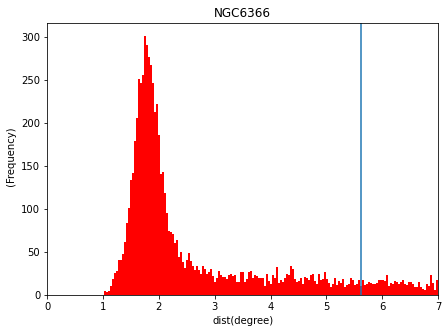

In [367]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
plt.figure(figsize=(7,5))
bins = 1000
plt.hist(dist,bins = bins,color='r')
plt.xlabel('dist(degree)')
plt.xlim(0,7)
plt.ylabel(' (Frequency)')
plt.title('NGC6366')
#plt.savefig("a.png", dpi=120)
plt.axvline(x=pmmean)
#plt.axvline(x=0.06044)

In [368]:
import numpy
pmmedian=numpy.median(hdu4["PM"])
print(pmmedian)

5.207


In [369]:
import numpy
pmmean=numpy.std(hdu4["BP-RP"])
print(pmmean)

0.20171971127099675


In [370]:
import pandas as pd 
# list of name, degree, score 
n = pmra
col = pmde 
val = dist
x= ra
y=dec
a=bprp
b=gmag
c=pm
d=plx

# dictionary of lists 
dict = {'pmra': n, 'pmde': col, 'dist': val,'ra':x, 'dec':y,'bprp':a, 'gmag': b, 'pm':c,'plx':d}  
level_df = pd.DataFrame(dict) 
print(level_df)

       pmra   pmde       dist          ra       dec      bprp       gmag  \
0    -0.403  1.957   7.802459  262.007659 -5.319833  2.071386  19.168783   
1    -1.998 -2.533   3.491913  261.988849 -5.320076  1.806189  18.803484   
2     6.095  3.248  11.746578  261.992246 -5.318183  1.562555  16.359903   
3     1.009 -3.411   3.457609  262.058390 -5.297629  1.683151  17.928726   
4     2.072 -3.554   4.327227  262.062920 -5.292796  1.619905  18.519123   
...     ...    ...        ...         ...       ...       ...        ...   
8030 -4.070 -4.224   4.121691  261.791118 -4.876863  1.682196  19.773443   
8031  2.352 -2.397   5.139741  261.814546 -4.861776  1.675455  20.205729   
8032 -2.870 -4.062   3.012226  261.817196 -4.861253  1.795277  18.846907   
8033 -0.265 -5.052   1.776360  261.817843 -4.860370  1.619381  19.024277   
8034 -1.159 -6.764   2.951322  261.817243 -4.862180  2.006779  18.937195   

         pm     plx  
0     1.998  0.3248  
1     3.226  0.4831  
2     6.906  0.5916  

In [371]:
level_df1=level_df[level_df['dist']<pmmedian/2] # half mean of proper motion
level_df1

,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
8,-0.516,-3.760,2.166403,262.023883,-5.310470,1.571274,20.352251,3.795,0.1812
15,-1.214,-5.660,1.866730,262.018487,-5.297688,1.413414,20.501064,5.788,0.1225
19,-1.397,-3.688,2.196589,262.036430,-5.295771,1.618120,18.622078,3.943,0.4859
21,-0.511,-5.666,1.981014,262.046577,-5.292914,1.568827,20.023020,5.689,0.2629
28,-1.200,-6.364,2.557469,262.045748,-5.276523,1.567951,19.926481,6.476,0.0387
...,...,...,...,...,...,...,...,...,...
8000,-0.461,-5.152,1.638385,262.031266,-4.877603,1.744898,19.313480,5.173,0.3140
8003,-1.705,-4.649,1.719812,262.046175,-4.859948,1.801189,17.973017,4.951,0.0182
8020,-0.207,-5.206,1.887445,261.988051,-4.837045,1.872490,16.922207,5.210,0.3386
8026,-0.842,-4.626,1.252726,261.767129,-4.893416,1.614750,19.724388,4.702,0.5334


In [372]:
level_df2=level_df[level_df['dist']>pmmedian/2]
level_df2

,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
0,-0.403,1.957,7.802459,262.007659,-5.319833,2.071386,19.168783,1.998,0.3248
1,-1.998,-2.533,3.491913,261.988849,-5.320076,1.806189,18.803484,3.226,0.4831
2,6.095,3.248,11.746578,261.992246,-5.318183,1.562555,16.359903,6.906,0.5916
3,1.009,-3.411,3.457609,262.058390,-5.297629,1.683151,17.928726,3.557,0.4643
4,2.072,-3.554,4.327227,262.062920,-5.292796,1.619905,18.519123,4.114,0.5234
...,...,...,...,...,...,...,...,...,...
8029,-2.752,1.154,7.222843,261.785923,-4.881988,1.505533,20.254585,2.984,0.3247
8030,-4.070,-4.224,4.121691,261.791118,-4.876863,1.682196,19.773443,5.865,0.4770
8031,2.352,-2.397,5.139741,261.814546,-4.861776,1.675455,20.205729,3.358,0.1276
8032,-2.870,-4.062,3.012226,261.817196,-4.861253,1.795277,18.846907,4.974,0.1959


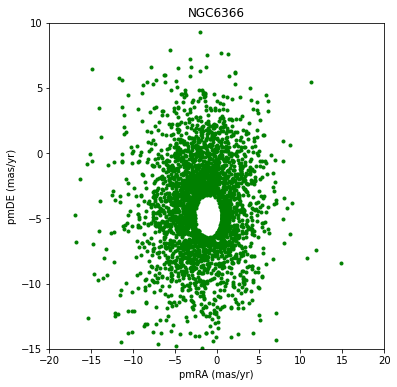

In [373]:
plt.figure(figsize=(6,6))
plt.plot(level_df2['pmra'],level_df2['pmde'],".",color='green')
plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
plt.title('NGC6366')
#plt.axis('square')
plt.xlim(-20,20)
plt.ylim(-15,10)
plt.savefig("e.png")
plt.show()

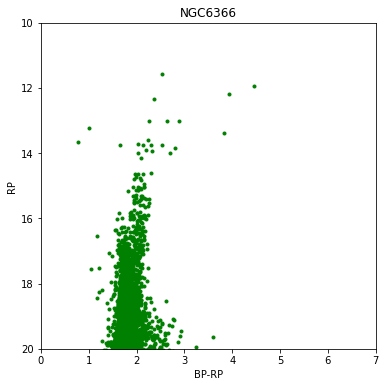

In [374]:
plt.figure(figsize=(6,6))
plt.plot(level_df2['bprp'],level_df2['gmag'],".",color='green')
plt.xlabel('BP-RP')
plt.ylabel('RP')
plt.title('NGC6366')
#plt.axis('square')
plt.xlim(0,7)
plt.ylim(20,10)
plt.savefig("e.png")
plt.show()

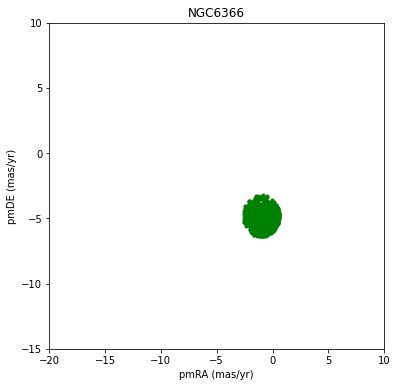

In [375]:
plt.figure(figsize=(6,6))
plt.plot(level_df1['pmra'],level_df1['pmde'],".",color='green')
plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
plt.title('NGC6366')
#plt.axis('square')
plt.xlim(-20,10)
plt.ylim(-15,10)
plt.savefig("e.png")
plt.show()

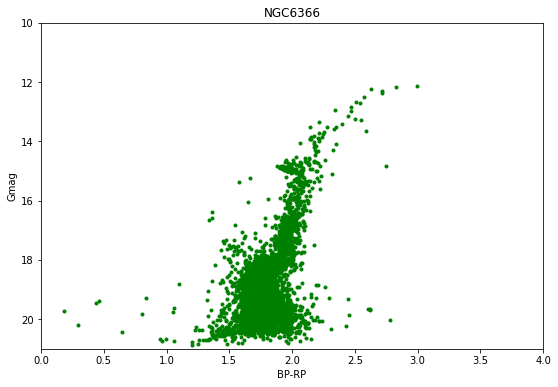

In [376]:
a1 =()
plt.figure(figsize=(9,6))
plt.plot(level_df1['bprp'],level_df1['gmag'],".",color='green')
plt.xlabel('BP-RP')
plt.ylabel('Gmag')
plt.title('NGC6366')
#plt.axis('square')
plt.ylim(21,10)
plt.xlim(0,4.0)

plt.show()

/home/bishnu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


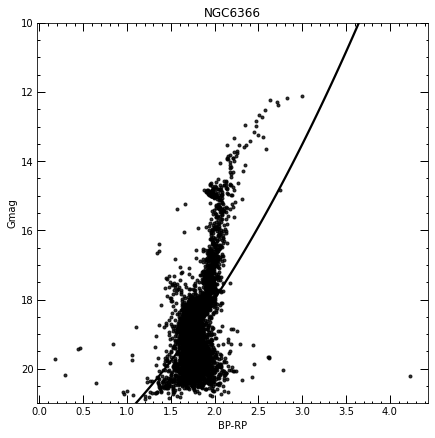

In [377]:
import seaborn as sns
plt.figure ( figsize=(7,7))
x= level_df1['bprp']
y= level_df1['gmag']
sns.regplot ( level_df1['bprp'],level_df1['gmag'], order= 2, ci = None ,marker = ".", color = "k")
# ci = None doesnot produce confidence 
plt.xlabel('BP-RP')
plt.ylabel('Gmag')
plt.title('NGC6366')
plt.minorticks_on()
plt.tick_params(axis="y", which='minor', length=2.5,width=1, direction='in',right= True)#minor ticks y right 
plt.tick_params(axis="y", which='major', direction='in',width=1, length=8,right= True)# major ticks
plt.tick_params(axis='x',which='minor', length=2.5,width=1, direction='in',top= True)# minor ticks  x top
plt.tick_params(axis='x',which='major', length=8,width=1, direction='in',top= True)# major ticks
#plt.plot(outlier1,outlier2,"r")
#plt.axis('square')
plt.ylim(21,10)
#plt.xlim(0,4.0)


plt.show()

In [378]:
import numpy
bprpstd=numpy.std(level_df1["bprp"])
print("3 STD= ",3* bprpstd)

3 STD=  0.5000899647007577


In [379]:
len(level_df1)

5023

In [380]:
import numpy
ymean=numpy.mean(hdu1["PM"])
print(ymean)

6.0068611596505175


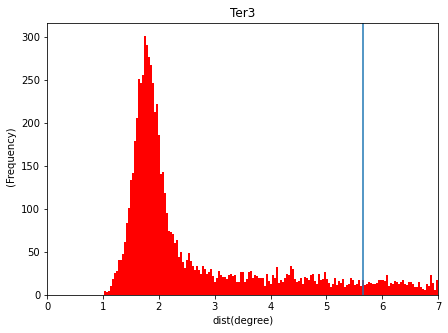

In [381]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
bins = 1000
plt.hist(dist,bins = bins,color='r')
plt.xlabel('dist(degree)')
plt.xlim(0,7)
#plt.ylim(0,600)
plt.ylabel(' (Frequency)')
plt.title('Ter3')
plt.savefig("a.png", dpi=120)
plt.axvline(x=5.660)

In [382]:
import pandas as pd 
# list of name, degree, score 
n = pmra
col = pmde 
val = dist
x= ra
y=dec
a=bprp
b=gmag
c=pm
d=plx

# dictionary of lists 
dict = {'pmra': n, 'pmde': col, 'dist': val,'ra':x, 'dec':y,'bprp':a, 'gmag': b, 'pm':c,'plx':d}  
level_dfx = pd.DataFrame(dict) 
print(level_dfx)

       pmra   pmde       dist          ra       dec      bprp       gmag  \
0    -0.403  1.957   7.802459  262.007659 -5.319833  2.071386  19.168783   
1    -1.998 -2.533   3.491913  261.988849 -5.320076  1.806189  18.803484   
2     6.095  3.248  11.746578  261.992246 -5.318183  1.562555  16.359903   
3     1.009 -3.411   3.457609  262.058390 -5.297629  1.683151  17.928726   
4     2.072 -3.554   4.327227  262.062920 -5.292796  1.619905  18.519123   
...     ...    ...        ...         ...       ...       ...        ...   
8030 -4.070 -4.224   4.121691  261.791118 -4.876863  1.682196  19.773443   
8031  2.352 -2.397   5.139741  261.814546 -4.861776  1.675455  20.205729   
8032 -2.870 -4.062   3.012226  261.817196 -4.861253  1.795277  18.846907   
8033 -0.265 -5.052   1.776360  261.817843 -4.860370  1.619381  19.024277   
8034 -1.159 -6.764   2.951322  261.817243 -4.862180  2.006779  18.937195   

         pm     plx  
0     1.998  0.3248  
1     3.226  0.4831  
2     6.906  0.5916  

In [383]:
level_dfx1=level_dfx[level_df['dist']<pmmedian/2]
#level_dfx1=level_dfx[level_df['bprp']<1.250]
#level_dfx1=level_dfx[level_df['bprp']<2.25]
level_dfx1

,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
8,-0.516,-3.760,2.166403,262.023883,-5.310470,1.571274,20.352251,3.795,0.1812
15,-1.214,-5.660,1.866730,262.018487,-5.297688,1.413414,20.501064,5.788,0.1225
19,-1.397,-3.688,2.196589,262.036430,-5.295771,1.618120,18.622078,3.943,0.4859
21,-0.511,-5.666,1.981014,262.046577,-5.292914,1.568827,20.023020,5.689,0.2629
28,-1.200,-6.364,2.557469,262.045748,-5.276523,1.567951,19.926481,6.476,0.0387
...,...,...,...,...,...,...,...,...,...
8000,-0.461,-5.152,1.638385,262.031266,-4.877603,1.744898,19.313480,5.173,0.3140
8003,-1.705,-4.649,1.719812,262.046175,-4.859948,1.801189,17.973017,4.951,0.0182
8020,-0.207,-5.206,1.887445,261.988051,-4.837045,1.872490,16.922207,5.210,0.3386
8026,-0.842,-4.626,1.252726,261.767129,-4.893416,1.614750,19.724388,4.702,0.5334


In [496]:
# Importing required modules
import math 
import numpy as np

# using selection Criteria

df   =level_dfx1[(level_dfx1['gmag']>10) & (level_dfx1['gmag']<11)]
dfa1 = level_dfx1[(level_dfx1['gmag']>11) & (level_dfx1['gmag']<12)] 
dfa2 = level_dfx1[(level_dfx1['gmag']>12) & (level_dfx1['gmag']<13)]
dfa3 = level_dfx1[(level_dfx1['gmag']>13) & (level_dfx1['gmag']<14)]
dfa4 = level_dfx1[(level_dfx1['gmag']>14) & (level_dfx1['gmag']<15)]
dfa5 = level_dfx1[(level_dfx1['gmag']>15) & (level_dfx1['gmag']<16)]
dfa6 = level_dfx1[(level_dfx1['gmag']>16) & (level_dfx1['gmag']<17)]
dfa7 = level_dfx1[(level_dfx1['gmag']>17) & (level_dfx1['gmag']<18)]
dfa8 = level_dfx1[(level_dfx1['gmag']>18) & (level_dfx1['gmag']<19)]
dfa9 = level_dfx1[(level_dfx1['gmag']>19) & (level_dfx1['gmag']<20)]
dfa10= level_dfx1[(level_dfx1['gmag']>20) & (level_dfx1['gmag']<21)]


# For Gmag 

n1 = np.mean (df['gmag'])
n2 = np.mean (dfa1['gmag'])
n3 = np.mean (dfa2['gmag'])
n4 = np.mean (dfa3['gmag'])
n5 = np.mean (dfa4['gmag'])
n6 = np.mean (dfa5['gmag'])
n7 = np.mean (dfa6['gmag'])
n8 = np.mean (dfa7['gmag'])
n9 = np.mean (dfa8['gmag'])
n10 = np.mean (dfa9['gmag'])


# For BP-RP

m1 = np.mean (df['bprp'])
m2 = np.mean (dfa1['bprp'])
m3 = np.mean (dfa2['bprp'])
m4 = np.mean (dfa3['bprp'])
m5 = np.mean (dfa4['bprp'])
m6 = np.mean (dfa5['bprp'])
m7 = np.mean (dfa6['bprp'])
m8 = np.mean (dfa7['bprp'])
m9 = np.mean (dfa8['bprp'])
m10 = np.mean (dfa9['bprp'])

################################

print ("Gmag = ", n1, n2, n3, n4, n5, n6, n7, n8, n9, n10)
print ("BP-RP = ", m1, m2, m3, m4, m5, m6, m7, m8, m9, m10)
print (m1, m2, m3, m4, m5, m6, m7, m8, m9, m10 ,',',\
      n1, n2, n3, n4, n5, n6, n7, n8, n9, n10)

Gmag =  nan nan 12.529054272727274 13.665073318181818 14.78356429702971 15.496733522935777 16.572889527950302 17.582637363636366 18.53795358095782 19.46768706243389
BP-RP =  nan nan 2.618147090909091 2.2799845454545458 2.0469053564356443 2.0379181100917436 1.9775278993710697 1.8820808842729981 1.75127780972389 1.7691260005913654
nan nan 2.618147090909091 2.2799845454545458 2.0469053564356443 2.0379181100917436 1.9775278993710697 1.8820808842729981 1.75127780972389 1.7691260005913654 , nan nan 12.529054272727274 13.665073318181818 14.78356429702971 15.496733522935777 16.572889527950302 17.582637363636366 18.53795358095782 19.46768706243389


In [497]:
x1=  print ([m1, m2, m3, m4, m5, m6, m7, m8, m9, m10])
y1=  print ([n1, n2, n3, n4, n5, n6, n7, n8, n9, n10])

[nan, nan, 2.618147090909091, 2.2799845454545458, 2.0469053564356443, 2.0379181100917436, 1.9775278993710697, 1.8820808842729981, 1.75127780972389, 1.7691260005913654]
[nan, nan, 12.529054272727274, 13.665073318181818, 14.78356429702971, 15.496733522935777, 16.572889527950302, 17.582637363636366, 18.53795358095782, 19.46768706243389]


In [498]:
import math 
import numpy as np
df =level_dfx1[(level_dfx1['gmag']>10) & (level_dfx1['gmag']<12)] #and level_df1[level_df1['gmag']<12]
n1 =np.mean (df['gmag'])
m1 = np.mean (df['bprp'])
print ("Gmag = ", n1)
print ("BP-RP = ", m1)
print (m1,',',n1)
df

Gmag =  nan
BP-RP =  nan
nan , nan


,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx


In [499]:
import math 
import numpy as np
df1 =  level_dfx1[(level_dfx1['gmag']>12) & (level_dfx1['gmag']<14)]
n2 =np.mean (df1['gmag'])
m2 = np.mean (df1['bprp'])
print ("Gmag = ", n2)
print ("BP-RP = ", m2)
print (m2,',',n2)
print ("Number of data =",len ( df1))
df1




Gmag =  13.286400303030304
BP-RP =  2.3927053939393934
2.3927053939393934 , 13.286400303030304
Number of data = 33


,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
489,-0.322,-5.214,1.789552,261.956446,-5.200640,2.468960,12.829833,5.224,0.2310
654,-1.315,-3.738,2.124175,261.796278,-5.258734,2.144604,13.533315,3.962,0.5292
843,-0.482,-5.202,1.648795,261.798398,-5.187854,2.398359,13.419612,5.224,0.2319
920,-0.312,-5.304,1.846411,261.938178,-5.176435,2.830784,12.162354,5.313,0.2274
1265,-0.266,-5.337,1.903020,261.950406,-5.127679,2.218558,13.982704,5.343,0.2539
1314,-0.251,-5.441,1.977994,261.893636,-5.155814,2.993163,12.126186,5.447,0.1812
1925,-0.337,-5.146,1.744298,261.925920,-5.104880,2.343085,12.942222,5.157,0.2483
2377,-0.277,-5.207,1.825498,261.850202,-5.104943,2.718762,12.367781,5.215,0.2499
2805,-0.374,-5.045,1.670800,261.875450,-5.072206,2.258436,13.703246,5.059,0.2291
2855,-0.406,-5.015,1.630797,261.877871,-5.049455,2.715730,12.291311,5.031,0.2563


In [500]:
import math 
import numpy as np
df2 =  level_dfx1[(level_dfx1['gmag']>14) & (level_dfx1['gmag']<16)]
n3 =np.mean (df2['gmag'])
m3 = np.mean (df2['bprp'])
print ("Gmag = ", n3)
print ("BP-RP = ", m3)
print (m3,',',n3)
print ("Number of data =",len ( df2))
df2


Gmag =  15.153733085714286
BP-RP =  2.0422405476190475
2.0422405476190475 , 15.153733085714286
Number of data = 210


,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
217,-1.328,-4.476,1.470614,261.922516,-5.292601,2.262183,14.633619,4.669,0.1140
218,-1.300,-4.858,1.297123,261.929985,-5.282065,2.135405,14.600544,5.029,0.1602
501,-1.379,-5.712,1.968221,262.010486,-5.211215,2.093209,15.231153,5.876,0.2457
518,-0.223,-5.378,1.961805,261.997601,-5.198365,2.016211,15.924912,5.383,0.3488
535,-0.391,-5.157,1.701442,262.012758,-5.186561,1.971289,14.947809,5.172,0.2515
...,...,...,...,...,...,...,...,...,...
7424,-0.469,-5.024,1.574415,262.009722,-4.892515,1.952171,14.939977,5.045,0.2296
7488,-0.574,-5.260,1.617172,261.848877,-4.983848,2.057097,14.825308,5.292,0.3203
7499,-0.378,-5.169,1.718630,261.845190,-4.963754,2.138640,14.767195,5.183,0.2525
7526,-0.482,-5.181,1.636615,261.832785,-4.950282,1.997428,14.984150,5.204,0.2803


In [501]:
import math 
import numpy as np
df3 =  level_dfx1[(level_dfx1['gmag']>16) & (level_dfx1['gmag']<18)]
n4 =np.mean (df3['gmag'])
m4 = np.mean (df3['bprp'])
print ("Gmag = ", n4)
print ("BP-RP = ", m4)
print (m4,',',n4)
df3

Gmag =  17.258793934262943
BP-RP =  1.9126778104838695
1.9126778104838695 , 17.258793934262943


,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
63,0.112,-4.045,2.359200,262.092507,-5.236826,1.965597,17.711988,4.046,0.1314
93,-1.027,-6.366,2.547424,261.902841,-5.319282,2.053045,17.190440,6.449,0.0966
151,0.093,-5.031,2.118807,261.941531,-5.295563,1.864172,17.535140,5.032,0.3190
184,-0.066,-6.047,2.546379,261.855520,-5.305570,1.772024,17.611769,6.048,0.2901
185,-1.677,-5.596,2.027175,261.863322,-5.301724,2.017693,17.248554,5.842,0.1166
...,...,...,...,...,...,...,...,...,...
7956,0.209,-4.867,2.215444,261.904653,-4.835494,1.997113,16.698362,4.872,0.2232
7960,0.512,-5.046,2.534410,262.086121,-4.924120,1.989220,17.369940,5.072,0.0972
7988,-2.105,-4.345,2.197226,262.068930,-4.885954,1.652471,16.035680,4.828,0.5994
8003,-1.705,-4.649,1.719812,262.046175,-4.859948,1.801189,17.973017,4.951,0.0182


In [502]:
import math 
import numpy as np
df4 =  level_dfx1[(level_dfx1['gmag']>18) & (level_dfx1['gmag']<20)]
n5 =np.mean (df4['gmag'])
m5 = np.mean (df4['bprp'])
print ("Gmag = ", n5)
print ("BP-RP = ", m5)
print (m5,',',n5)
df4

Gmag =  19.020169903677235
BP-RP =  1.7602683640154846
1.7602683640154846 , 19.020169903677235


,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
19,-1.397,-3.688,2.196589,262.036430,-5.295771,1.618120,18.622078,3.943,0.4859
28,-1.200,-6.364,2.557469,262.045748,-5.276523,1.567951,19.926481,6.476,0.0387
34,0.370,-5.350,2.474520,262.096835,-5.265913,1.648197,19.441526,5.363,0.1667
35,-0.239,-4.984,1.784101,262.100393,-5.262212,1.809982,19.364490,4.990,0.1221
39,-0.661,-5.405,1.679990,262.072529,-5.278982,1.748201,18.044601,5.446,0.4384
...,...,...,...,...,...,...,...,...,...
7992,-2.109,-4.943,2.110491,262.044109,-4.880694,1.794815,18.975340,5.374,0.2176
7996,0.097,-5.298,2.202155,262.049544,-4.873477,1.938259,19.897087,5.299,0.5480
8000,-0.461,-5.152,1.638385,262.031266,-4.877603,1.744898,19.313480,5.173,0.3140
8026,-0.842,-4.626,1.252726,261.767129,-4.893416,1.614750,19.724388,4.702,0.5334


In [503]:
import math 
import numpy as np
df5 =  level_dfx1[(level_dfx1['gmag']>20) & (level_dfx1['gmag']<21)]
n6 =np.mean (df5['gmag'])
m6 = np.mean (df5['bprp'])
print ("Gmag = ", n6)
print ("BP-RP = ", m6)
print (m6,',',n6)


Gmag =  20.28235764912282
BP-RP =  1.7359654466546093
1.7359654466546093 , 20.28235764912282


In [504]:
x1=  print ([m1, m2, m3, m4, m5, m6, m7, m8, m9, m10])
y1=  print ([n1, n2, n3, n4, n5, n6, n7, n8, n9, n10])

[nan, 2.3927053939393934, 2.0422405476190475, 1.9126778104838695, 1.7602683640154846, 1.7359654466546093, 1.9775278993710697, 1.8820808842729981, 1.75127780972389, 1.7691260005913654]
[nan, 13.286400303030304, 15.153733085714286, 17.258793934262943, 19.020169903677235, 20.28235764912282, 16.572889527950302, 17.582637363636366, 18.53795358095782, 19.46768706243389]


In [505]:
[nan, nan, 2.618147090909091, 2.2799845454545458, 2.0469053564356443, 2.0379181100917436, 1.8820808842729981, 1.75127780972389, 1.7691260005913654, 1.7359654466546093]
[nan, nan, 12.529054272727274, 13.665073318181818, 14.78356429702971, 15.496733522935777, 17.582637363636366, 18.53795358095782, 19.46768706243389, 20.28235764912282]

[nan,
 nan,
 12.529054272727274,
 13.665073318181818,
 14.78356429702971,
 15.496733522935777,
 17.582637363636366,
 18.53795358095782,
 19.46768706243389,
 20.28235764912282]

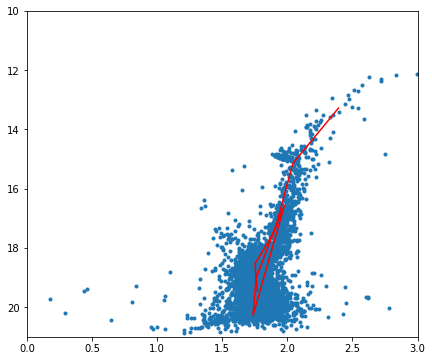

In [514]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure (figsize=(7,6))
y= np.array([m1, m2, m3, m4, m5, m6, m7, m8, m9, m10])
x= np.array([n1, n2, n3, n4, n5, n6, n7, n8, n9, n10])
x1 = level_dfx1['bprp']
y1 = level_dfx1['gmag']
plt.ylim (21,10)
plt.xlim (0, 3)
plt.plot (x1,y1,".")
plt.plot (y,x,'-r')

/tmp/ipykernel_3683/475394781.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(level_dfx1['bprp'],level_dfx1['gmag'],".",color='k'
/home/bishnu/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


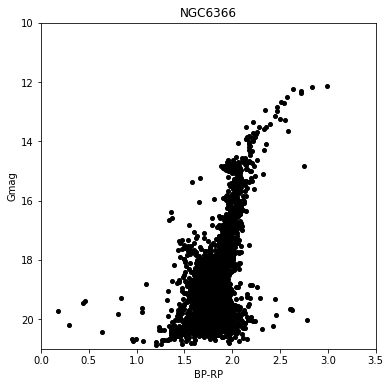

In [508]:
import numpy as np
import warnings
import cv2
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
y1=np.array([ m2, m3, m4, m5, m6, m7, m8, m9, m10])
x1=np.array([ n2, n3, n4, n5, n6, n7, n8, n9, n10])
 

plt.xlabel('BP-RP')
plt.ylabel('Gmag')
plt.title('NGC6366')
plt.ylim(21,10)
plt.xlim(0,3.5)

plt.plot(level_dfx1['bprp'],level_dfx1['gmag'],".",color='k'
         ,linestyle = '', marker = '.',alpha=1, markersize=8)

# Upper line
mymodel = numpy.poly1d(numpy.polyfit(y1, x1, 20))
myline = numpy.linspace(21, 10, 20)
plt.plot(myline, mymodel(myline),"r-", markersize=8,alpha=1)
plt.show ()

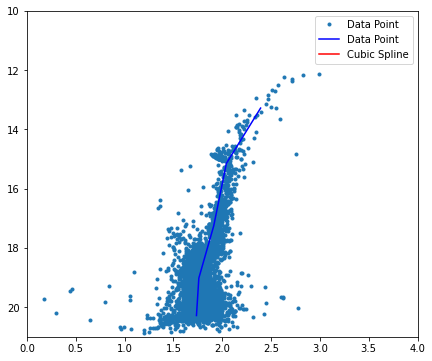

In [395]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
plt.figure(figsize=(7,6))
x = level_dfx1['bprp']
y = level_dfx1['gmag']
x1=np.array([ 13.286400303030304, 15.153733085714286, 17.258793934262943, 19.020169903677235, 20.28235764912282])
y1=np.array([ 2.3927053939393934, 2.0422405476190475, 1.9126778104838695, 1.7602683640154846, 1.7359654466546093])
arr = np.arange(np.amin(y1), np.amax(y1), 0.01)
s = interpolate.CubicSpline(x1, y1)
plt.plot(x,y,".",y1, x1, 'b', label='Data Point')
plt.plot(arr, s(arr), 'r-', label='Cubic Spline')
plt.legend()
plt.ylim(21,10)
plt.xlim(0,4)
plt.show()

In [396]:
level_dfx2=level_dfx[level_dfx['dist']>pmmedian/2]
level_dfx2

,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
0,-0.403,1.957,7.802459,262.007659,-5.319833,2.071386,19.168783,1.998,0.3248
1,-1.998,-2.533,3.491913,261.988849,-5.320076,1.806189,18.803484,3.226,0.4831
2,6.095,3.248,11.746578,261.992246,-5.318183,1.562555,16.359903,6.906,0.5916
3,1.009,-3.411,3.457609,262.058390,-5.297629,1.683151,17.928726,3.557,0.4643
4,2.072,-3.554,4.327227,262.062920,-5.292796,1.619905,18.519123,4.114,0.5234
...,...,...,...,...,...,...,...,...,...
8029,-2.752,1.154,7.222843,261.785923,-4.881988,1.505533,20.254585,2.984,0.3247
8030,-4.070,-4.224,4.121691,261.791118,-4.876863,1.682196,19.773443,5.865,0.4770
8031,2.352,-2.397,5.139741,261.814546,-4.861776,1.675455,20.205729,3.358,0.1276
8032,-2.870,-4.062,3.012226,261.817196,-4.861253,1.795277,18.846907,4.974,0.1959


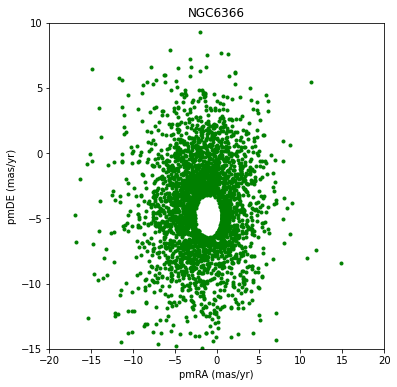

In [397]:
plt.figure(figsize=(6,6))
plt.plot(level_dfx2['pmra'],level_dfx2['pmde'],".",color='green')
plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
plt.title('NGC6366')
#plt.axis('square')
plt.xlim(-20,20)
plt.ylim(-15,10)
plt.savefig("e.png")
plt.show()

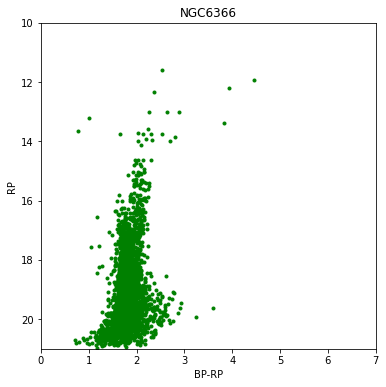

In [398]:

plt.figure(figsize=(6,6))
plt.plot(level_dfx2['bprp'],level_dfx2['gmag'],".",color='green')
plt.xlabel('BP-RP')
plt.ylabel('RP')
plt.title('NGC6366')
#plt.axis('square')
plt.xlim(0,7)
plt.ylim(21,10)
plt.savefig("e.png")
plt.show()

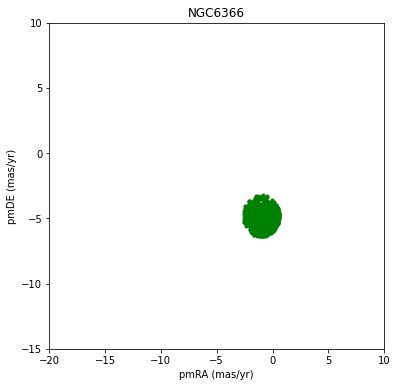

In [399]:
plt.figure(figsize=(6,6))
plt.plot(level_dfx1['pmra'],level_dfx1['pmde'],".",color='green')
plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
plt.title('NGC6366')
#plt.axis('square')
plt.xlim(-20,10)
plt.ylim(-15,10)
plt.savefig("e.png")
plt.show()

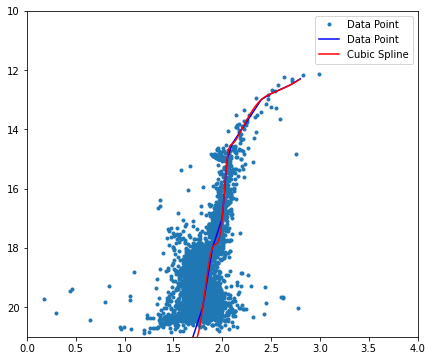

In [400]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
plt.figure(figsize=(7,6))
x = level_dfx1['bprp']
y = level_dfx1['gmag']
x1=np.array([1.7,1.8,1.9,2.0, 2.05,2.1,2.2,2.4,2.5,2.7,2.8])
y1=np.array([21,20, 18,17,15,14.5,14,13,12.8, 12.5,12.3])
arr = np.arange(np.amin(x1), np.amax(x1), 0.01)
s = interpolate.CubicSpline(x1, y1)
plt.plot(x,y,".",x1, y1, 'b', label='Data Point')
plt.plot(arr, s(arr), 'r-', label='Cubic Spline')
plt.legend()
plt.ylim(21,10)
plt.xlim(0,4)
plt.show()

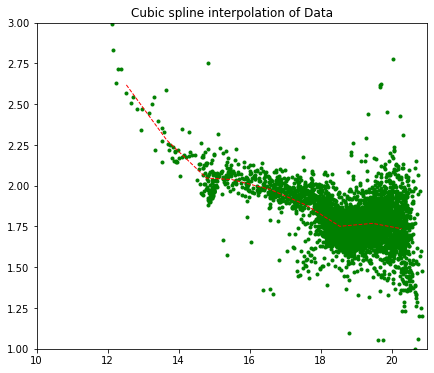

In [458]:
import numpy,pylab
from numpy import *
import scipy.interpolate
plt.figure(figsize=(7,6))
y=np.array([n1, n2, n3, n4, n5, n6, n7, n8, n9, n10,n11])
x=np.array([m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11])
y1 = level_dfx1['bprp']
x1 = level_dfx1['gmag']
spline_cubic_x=linspace(10,21,num=100)
cubic_spline=scipy.interpolate.interp1d(x,y,kind='cubic')
spline_cubic_y=cubic_spline(spline_cubic_x)
pylab.plot(x1,y1,"g.",y, x, 'r--', spline_cubic_x, spline_cubic_y,
'r:',linewidth=1)
plt.xlim(10,21)
plt.ylim(1,3)
pylab.title('Cubic spline interpolation of Data')
pylab.show()

/tmp/ipykernel_3683/503646082.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(level_dfx1['gmag'],level_dfx1['bprp'],".",color='k'
/home/bishnu/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/bishnu/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_3683/503646082.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(level_dfx1['gmag'][m],level_dfx1['bprp'][m],".",color='g'
/tmp/ipykernel_3683/503646082.py:31: UserWarning: marker is redundantly defined by the 'marker' ke

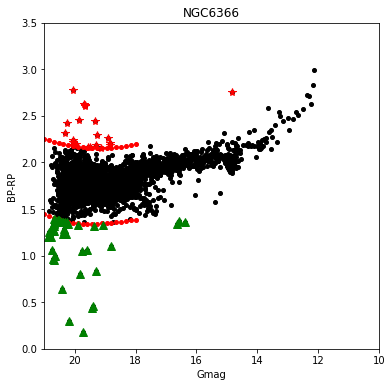

In [402]:
import numpy as np
import warnings
import cv2
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
x1=np.array([18,19,21])
y1=np.array([1.79,1.75,1.85])+[0.403] #2sigma of bp-rp
x2=np.array([18,19,21])
y2=np.array([1.79,1.75,1.85])-[0.403]
plt.plot(level_dfx1['gmag'],level_dfx1['bprp'],".",color='k'
         ,linestyle = '', marker = '.',alpha=1, markersize=8)

# Upper line
mymodel = numpy.poly1d(numpy.polyfit(x1, y1, 3))
myline = numpy.linspace(21, 18, 20)
plt.plot(myline, mymodel(myline),"r.", markersize=8,alpha=1)
# Lower line
mymodel2 = numpy.poly1d(numpy.polyfit(x2, y2, 10))
myline2 = numpy.linspace(21, 18, 20)
plt.plot(myline2, mymodel2(myline2),"r.", markersize=8,alpha=1)
#points.clear()
#Lower liner limit m
m = (level_dfx1['bprp'] < mymodel2(level_dfx1['gmag'])) 
#upper liner limit n
n=(level_dfx1['bprp'] > mymodel(level_dfx1['gmag']))
plt.plot(level_dfx1['gmag'][m],level_dfx1['bprp'][m],".",color='g'
         ,linestyle = '', marker = '^',alpha=1, markersize=8)
plt.plot(level_dfx1['gmag'][n],level_dfx1['bprp'][n],".",color='r'
         ,linestyle = '', marker = '*',alpha=1, markersize=8)


plt.ylabel('BP-RP')
plt.xlabel('Gmag')
plt.title('NGC6366')
plt.xlim(21,10)
plt.ylim(0,3.5)
plt.savefig("e.png")
#plt.grid(True) # This give us a grid line in a plot.
plt.show()

In [403]:
point=[]
for points in level_dfx1['gmag'][m]:
    points>=18
    point.append(points)
print(point)
        

       
        
        
        


[20.37527, 20.470646, 20.254335, 20.678907, 20.180939, 16.58718, 20.667141, 20.748625, 20.780506, 20.82775, 19.839907, 20.698233, 20.71412, 20.375101, 19.402025, 20.868078, 20.311012, 20.22623, 19.438547, 20.552649, 20.522346, 20.65666, 20.686901, 19.756153, 20.686245, 20.41703, 19.060255, 20.424534, 19.721703, 20.350286, 19.88872, 19.60829, 19.359425, 16.388573, 20.483183, 16.65119, 20.353077, 19.297518, 20.591373, 20.671179, 20.721586, 20.651499, 20.692207, 20.521198, 18.801167, 20.27942]


In [404]:
pointlow=[]
for points in level_dfx1['gmag'][m]:
    if points>18:
        pointlow.append(points)
print(pointlow)

[20.37527, 20.470646, 20.254335, 20.678907, 20.180939, 20.667141, 20.748625, 20.780506, 20.82775, 19.839907, 20.698233, 20.71412, 20.375101, 19.402025, 20.868078, 20.311012, 20.22623, 19.438547, 20.552649, 20.522346, 20.65666, 20.686901, 19.756153, 20.686245, 20.41703, 19.060255, 20.424534, 19.721703, 20.350286, 19.88872, 19.60829, 19.359425, 20.483183, 20.353077, 19.297518, 20.591373, 20.671179, 20.721586, 20.651499, 20.692207, 20.521198, 18.801167, 20.27942]


In [405]:
pointup=[]
for pointsb in level_dfx1['gmag'][n]:
    if pointsb>18:
        pointup.append(pointsb)
print(pointup)
        

[19.692663, 18.902018, 18.847345, 20.023169, 20.070139, 18.848824, 19.554308, 20.044971, 19.283327, 20.060076, 19.32831, 19.66306, 20.324953, 19.857435, 19.278849, 20.223883, 20.243484, 19.140514, 20.05673, 19.663252, 19.493565, 19.93908]


In [406]:
outlier=print(pointup,pointlow)
outlier

[19.692663, 18.902018, 18.847345, 20.023169, 20.070139, 18.848824, 19.554308, 20.044971, 19.283327, 20.060076, 19.32831, 19.66306, 20.324953, 19.857435, 19.278849, 20.223883, 20.243484, 19.140514, 20.05673, 19.663252, 19.493565, 19.93908] [20.37527, 20.470646, 20.254335, 20.678907, 20.180939, 20.667141, 20.748625, 20.780506, 20.82775, 19.839907, 20.698233, 20.71412, 20.375101, 19.402025, 20.868078, 20.311012, 20.22623, 19.438547, 20.552649, 20.522346, 20.65666, 20.686901, 19.756153, 20.686245, 20.41703, 19.060255, 20.424534, 19.721703, 20.350286, 19.88872, 19.60829, 19.359425, 20.483183, 20.353077, 19.297518, 20.591373, 20.671179, 20.721586, 20.651499, 20.692207, 20.521198, 18.801167, 20.27942]


In [407]:
df=level_dfx1[ level_dfx1['gmag'].isin([20.37527, 20.470646, 20.254335, 20.678907, 20.180939, 20.667141, 20.748625, 20.780506, 20.82775, 19.839907, 20.698233, 20.71412, 20.375101, 19.402025, 20.868078, 20.311012, 20.22623, 19.438547, 20.552649, 20.522346, 20.65666, 20.686901, 19.756153, 20.686245, 20.41703, 19.060255, 20.424534, 19.721703, 20.350286, 19.88872, 19.60829, 19.359425, 20.483183, 20.353077, 19.297518, 20.591373, 20.671179, 20.721586, 20.651499, 20.692207, 20.521198, 18.801167, 20.27942,19.692663, 18.902018, 
                                        18.847345, 20.023169, 20.070139, 18.848824, 19.554308, 20.044971,
                                        19.283327, 20.060076, 19.32831, 19.66306, 20.324953, 19.857435,
                                        19.278849, 20.223883, 20.243484, 19.140514, 20.05673, 19.663252,
                                        19.493565, 19.93908])]
df

,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
33,-1.816,-5.894,2.346532,262.091248,-5.270256,1.358614,20.375270,6.168,0.2964
116,0.141,-3.765,2.557166,261.950403,-5.316547,1.366283,20.470646,3.768,0.2838
316,-0.221,-3.796,2.288947,261.978863,-5.257785,2.623243,19.692663,3.803,0.0830
353,-1.770,-3.888,2.204465,262.061645,-5.237109,2.260544,18.902018,4.272,0.1841
472,-1.120,-5.747,1.935311,261.957906,-5.217703,1.358345,20.254335,5.855,0.0594
...,...,...,...,...,...,...,...,...,...
7565,-1.881,-4.505,1.930028,261.906462,-4.926908,1.378668,20.521198,4.882,0.0327
7608,-0.064,-4.863,1.942525,261.880987,-4.909107,1.098909,18.801167,4.863,0.2268
7638,0.318,-4.422,2.381667,261.813994,-4.934021,1.231979,20.279420,4.433,0.2113
7688,-1.094,-4.068,1.755926,261.820583,-4.909020,2.170433,19.493565,4.212,0.4106


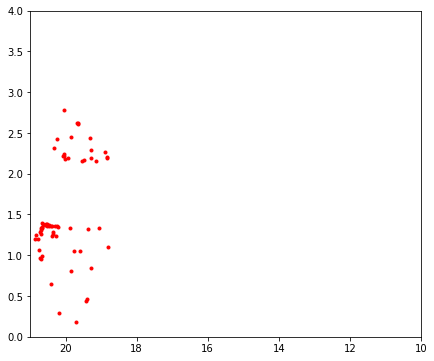

In [408]:
plt.figure(figsize=(7,6))
plt.plot(df['gmag'],df['bprp'],"r.")
plt.xlim(21,10)
plt.ylim(0,4)
plt.show()

In [409]:
dfa1=pd.concat([level_dfx1, df, df]).drop_duplicates(keep=False)
dfa1

,pmra,pmde,dist,ra,dec,bprp,gmag,pm,plx
8,-0.516,-3.760,2.166403,262.023883,-5.310470,1.571274,20.352251,3.795,0.1812
15,-1.214,-5.660,1.866730,262.018487,-5.297688,1.413414,20.501064,5.788,0.1225
19,-1.397,-3.688,2.196589,262.036430,-5.295771,1.618120,18.622078,3.943,0.4859
21,-0.511,-5.666,1.981014,262.046577,-5.292914,1.568827,20.023020,5.689,0.2629
28,-1.200,-6.364,2.557469,262.045748,-5.276523,1.567951,19.926481,6.476,0.0387
...,...,...,...,...,...,...,...,...,...
8000,-0.461,-5.152,1.638385,262.031266,-4.877603,1.744898,19.313480,5.173,0.3140
8003,-1.705,-4.649,1.719812,262.046175,-4.859948,1.801189,17.973017,4.951,0.0182
8020,-0.207,-5.206,1.887445,261.988051,-4.837045,1.872490,16.922207,5.210,0.3386
8026,-0.842,-4.626,1.252726,261.767129,-4.893416,1.614750,19.724388,4.702,0.5334


/tmp/ipykernel_3683/2516124348.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(dfa1['bprp'],dfa1['gmag'],".",color='k'


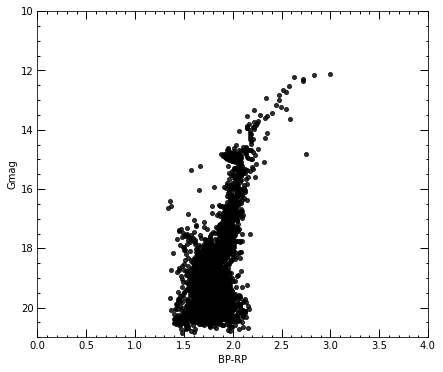

In [410]:
plt.figure(figsize=(7,6))
plt.plot(dfa1['bprp'],dfa1['gmag'],".",color='k'
         ,linestyle = '', marker = '.',alpha=0.8, markersize=8)
plt.minorticks_on()
plt.tick_params(axis="y", which='minor', length=2.5,width=1, direction='in',right= True)#minor ticks y right 
plt.tick_params(axis="y", which='major', direction='in',width=1, length=8,right= True)# major ticks
plt.tick_params(axis='x',which='minor', length=2.5,width=1, direction='in',top= True)# minor ticks  x top
plt.tick_params(axis='x',which='major', length=8,width=1, direction='in',top= True)# major ticks
plt.xlabel("BP-RP")
plt.ylabel("Gmag")
plt.ylim(21,10)
plt.xlim(0,4)
plt.show()

In [411]:
level_dfx1['gmag'][n]>18

316      True
353      True
833     False
1085     True
1624     True
1762     True
1814     True
1940     True
2051     True
2375     True
2615     True
2840     True
3489     True
4219     True
4733     True
4872     True
5382     True
6195     True
7055     True
7283     True
7375     True
7688     True
7725     True
Name: gmag, dtype: bool

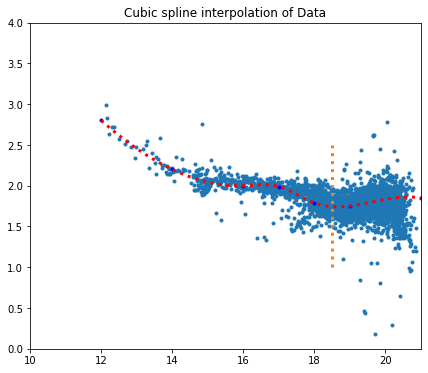

In [412]:
import numpy,pylab
from numpy import *
import scipy.interpolate
f=plt.figure(figsize=(7,6))
ax=f.add_subplot(111)
#ax.yaxis.tick_right()
x=np.array([12,14,16,17,18,19,21])
y=np.array([2.8,2.2,2,1.99,1.79,1.75,1.85])
y1 = level_dfx1['bprp']
x1 = level_dfx1['gmag']
x2=[1,2,2.5]
y2=[18.5,18.5,18.5]
spline_cubic_x=linspace(12,21,num=200)
cubic_spline=scipy.interpolate.interp1d(x,y,kind='cubic')
spline_cubic_y=cubic_spline(spline_cubic_x)
pylab.plot(x1,y1,".",x, y, 'b.', y2,x2,":",spline_cubic_x, spline_cubic_y,
'r:',linewidth=3)
plt.xlim(10,21)
plt.ylim(0,4)
pylab.title('Cubic spline interpolation of Data')
pylab.show()

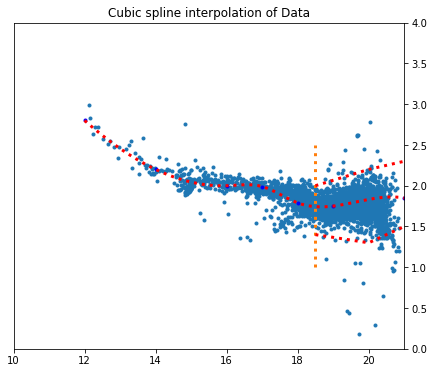

In [413]:
import numpy,pylab
from numpy import *
import scipy.interpolate
f=plt.figure(figsize=(7,6))
ax=f.add_subplot(111)
ax.yaxis.tick_right()
x=np.array([12,14,16,17,18,19,21])
y=np.array([2.8,2.2,2,1.99,1.79,1.75,1.85])
y1 = level_dfx1['bprp']
x1 = level_dfx1['gmag']
x2=[1,2,2.5]
y2=[18.5,18.5,18.5]
x3=[18.5,20,21]
y3=[2.0,2.2,2.3]
x4=[18.5,20,21]
y4=[1.4,1.3,1.5]
spline_cubic_x=linspace(12,21,num=200)
cubic_spline=scipy.interpolate.interp1d(x,y,kind='cubic')
spline_cubic_y=cubic_spline(spline_cubic_x)
pylab.plot(x1,y1,".",x, y, 'b.', y2,x2,":",x3,y3,'r:',x4,y4,'r:',spline_cubic_x, spline_cubic_y,
'r:',linewidth=3)
plt.xlim(10,21)
plt.ylim(0,4)
pylab.title('Cubic spline interpolation of Data')

pylab.show()

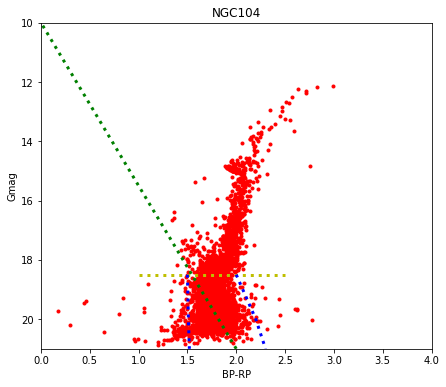

In [414]:
plt.figure(figsize=(7,6))
x1=[2,0]
y1=[21,10]
x2=[1,2,2.5]
y2=[18.5,18.5,18.5]
x3=[18.5,20,21]
y3=[2.0,2.2,2.3]
x4=[18.5,20,21]
y4=[1.5,1.51,1.52]
# x1,y1= diagonal line, x2,y2=horizontal line
#x3,y3= Right side line, x4,y4=Left side line
#d= level_dfx1['bprp'] >= 1.5
#e= level_dfx1['gmag'] <= 18.5

plt.plot(level_dfx1['bprp'],level_dfx1['gmag'],"r.",x1,y1,'g:', x2,y2,"y:",y3,x3,'b:',y4,x4,'b:',linewidth=3)
plt.xlabel('BP-RP')
plt.ylabel('Gmag')
plt.title('NGC104')
#plt.axis('square')
plt.ylim(21,10)
plt.xlim(0,4)

#plt.grid(True) # This give us a grid line in a plot.
plt.show()

In [415]:
x=level_dfx1['bprp']
y=level_dfx1['gmag']
for a in x:
     1.25<=a<=2.0
for b in y:
     y<=18.5

print(a)
print(b)

1.619381
19.024277


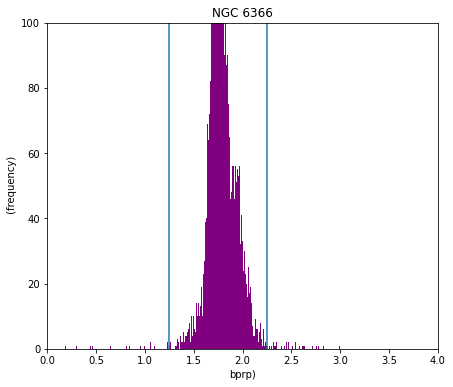

In [416]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,6))
bins =500
binsize=1
plt.hist(x,bins = bins,color='purple')
plt.xlabel('bprp)')
plt.xlim(0,4)
plt.ylim(0,100)
plt.ylabel(' (frequency)')
plt.title('NGC 6366')
plt.axvline(x=2.25)
plt.axvline(x=1.25)
plt.show()

In [417]:
print(np.where((level_dfx1['bprp']<1.5) & (level_dfx1['gmag']>18.5)))

(array([   1,    5,   18,   20,   54,   56,   78,   80,  101,  124,  125,
        157,  168,  239,  244,  581,  586,  602,  636,  682,  885,  899,
        949,  985, 1011, 1046, 1141, 1150, 1219, 1281, 1302, 1303, 1318,
       1338, 1339, 1369, 1457, 1543, 1544, 1560, 1582, 1605, 1644, 1681,
       1701, 1774, 1845, 1945, 1969, 1991, 1994, 2006, 2015, 2020, 2049,
       2126, 2128, 2175, 2366, 2426, 2517, 2519, 2564, 2585, 2645, 2648,
       2650, 2691, 2700, 2723, 2734, 2748, 2761, 2803, 2852, 2902, 2911,
       2920, 3195, 3297, 3300, 3330, 3349, 3428, 3461, 3542, 3600, 3672,
       3756, 3761, 3910, 3998, 3999, 4528, 4558, 4628, 4640, 4649, 4650,
       4668, 4710, 4909, 4931, 4937, 4938, 4942, 4979]),)


In [418]:
print("Number of bprp=", len(x))
print("Number of gmag=", len(y))

Number of bprp= 5023
Number of gmag= 5023


/tmp/ipykernel_3683/2435858948.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(x,y,'k.', linewidth=3, marker='.',alpha=1)


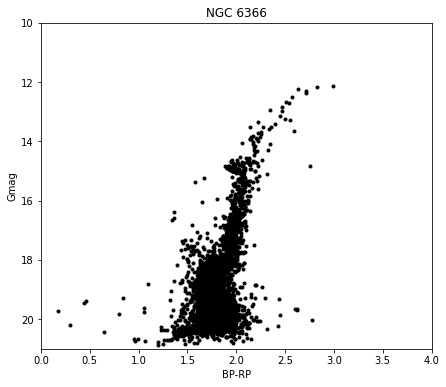

In [419]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))           
plt.plot(x,y,'k.', linewidth=3, marker='.',alpha=1)
plt.xlabel("BP-RP")
plt.ylabel("Gmag")
plt.title("NGC 6366")
plt.xlim(0,4)
plt.ylim(21,10)
plt.show()

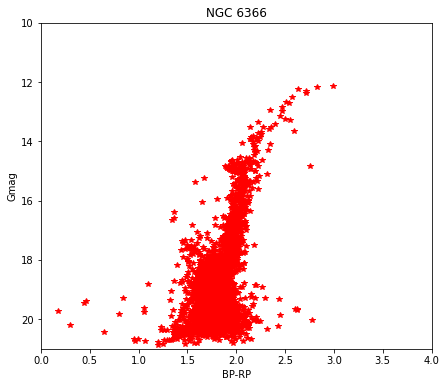

In [420]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))           
plt.plot(x,y,'r*', linewidth=3,alpha=1,)
plt.xlabel("BP-RP")
plt.ylabel("Gmag")
plt.title("NGC 6366")
plt.xlim(0,4)
plt.ylim(21,10)
plt.show()